In [2]:
from rdf.rdf import get_rdf_val
from constants.constants import get_silicon_all_scf_data, get_silicon_all_scf_data_sd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
all_dirs_dict = get_silicon_all_scf_data_sd(as_dict=True)

In [4]:
from analyze.n2p2_lattice import N2p2Lattice, get_structures_for_n2p2_lattice

path2inputdata = '/Users/y1u0d2/desktop/Lab/result/n2p2/Si/90/01'
i_filename = 'input.data'

structures = get_structures_for_n2p2_lattice(path2inputdata, i_filename)

In [4]:
all_dirs_dict = {}

for structure in structures:
    n2p2_lattice = N2p2Lattice(structure)

    if 'dimer' in n2p2_lattice.mpid:
        continue

    mpid = n2p2_lattice.mpid
    try:
        all_dirs_dict[mpid].append(n2p2_lattice.path)
    except:
        all_dirs_dict[mpid] = [n2p2_lattice.path]
    # all_dirs.append(n2p2_lattice.path)


In [11]:
rcut = 6
bins = 200

1   HIToolbox                           0x00007ff8167ea726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff8167ea2b8 _ZN15MenuBarInstance14EnableAutoShowEv + 52
3   HIToolbox                           0x00007ff81678e908 SetMenuBarObscured + 408
4   HIToolbox                           0x00007ff81678e4ca _ZN13HIApplication15HandleActivatedEP14OpaqueEventRefhP15OpaqueWindowPtrh + 164
5   HIToolbox                           0x00007ff816788996 _ZN13HIApplication13EventObserverEjP14OpaqueEventRefPv + 252
6   HIToolbox                           0x00007ff816750bd2 _NotifyEventLoopObservers + 153
7   HIToolbox                           0x00007ff8167883e6 AcquireEventFromQueue + 494
8   HIToolbox                           0x00007ff8167773ec ReceiveNextEventCommon + 285
9   HIToolbox                           0x00007ff8167772b3 _BlockUntilNextEventMatchingListInModeWithFilter + 70
10  AppKit                              0x00007ff80ff7ef33 _DPS

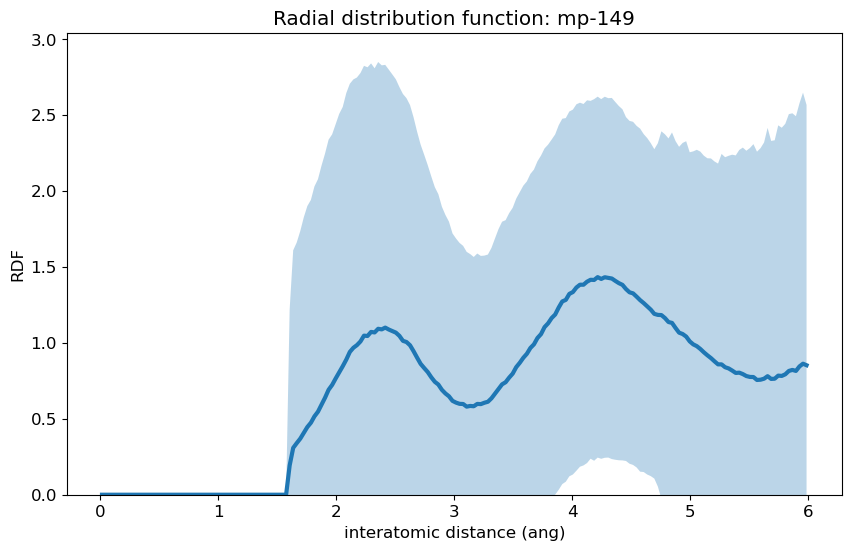

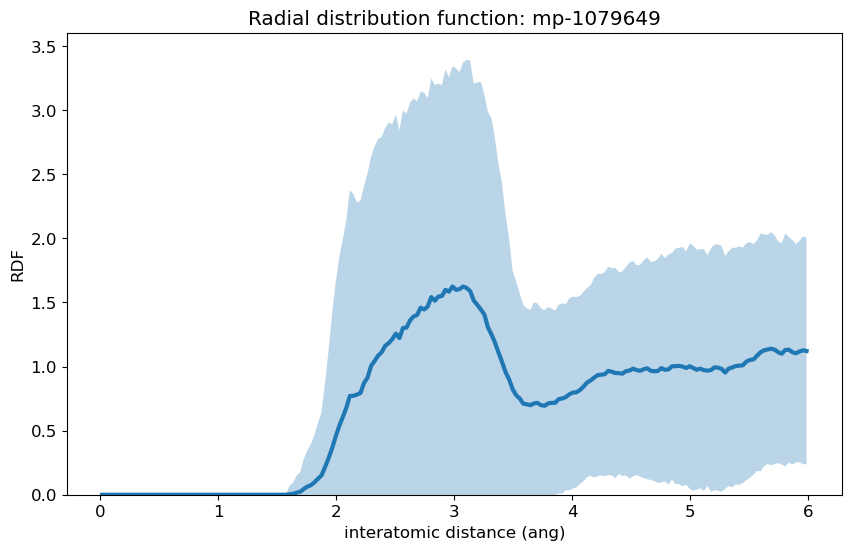

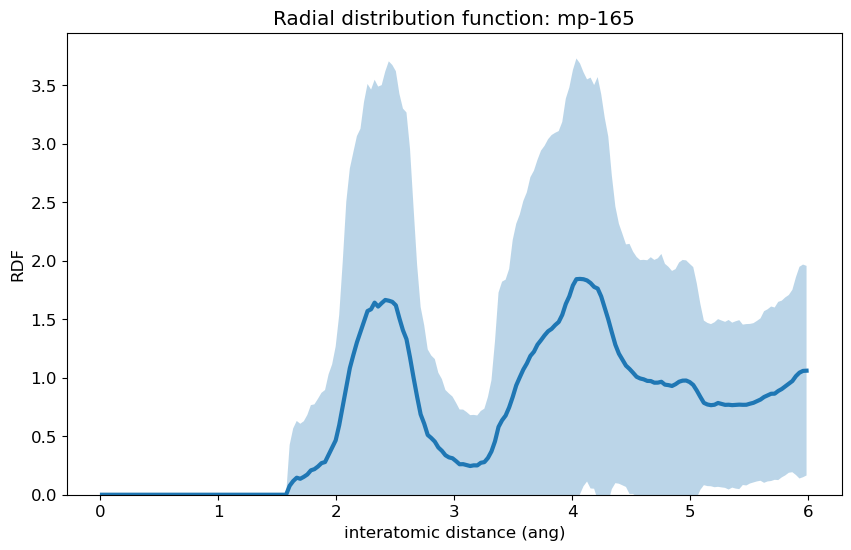

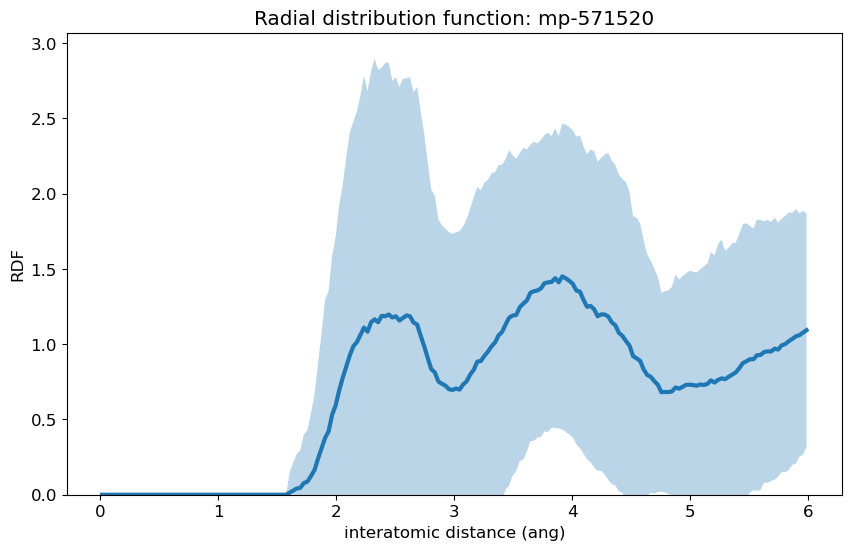

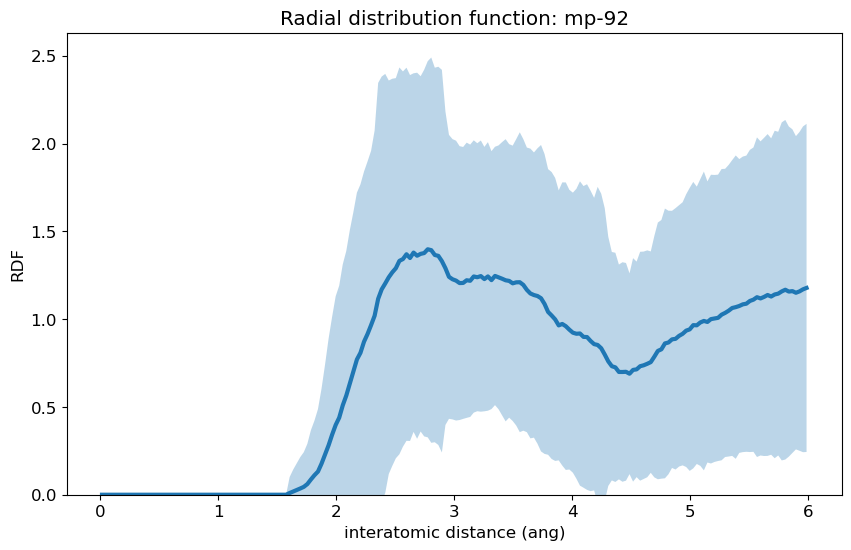

In [6]:
import os
for mpid, all_dirs in all_dirs_dict.items():
    linspace, rdf_val = get_rdf_val(rcut, bins, all_dirs)

    rdf_mean = np.mean(rdf_val, axis=0)
    rdf_std = np.std(rdf_val, axis=0)

    fig = plt.figure(figsize=(10,6))
    plt.rcParams['font.size'] = '12'
    ax = fig.add_subplot(111)
    ax.set_title(f'Radial distribution function: {mpid}')
    ax.set_xlabel('interatomic distance (ang)')
    ax.set_ylabel('RDF')

    ax.plot(linspace, rdf_mean, lw=3)
    ax.fill_between(linspace, rdf_mean+rdf_std, rdf_mean-rdf_std, alpha=0.3)
    ax.set_ylim(0, )
    # fig.savefig(os.path.join('/Users/y1u0d2/desktop/Lab/result/rdf/Si/around_stable', f'{mpid}.png'))
    fig.show()

In [1]:
from ml_utils.util import flatten

all_dirs = list(flatten(all_dirs_dict.values()))

NameError: name 'all_dirs_dict' is not defined

In [10]:
with open(os.path.join('/Users/y1u0d2/desktop/Lab/result/n2p2/Si/90/data', 'dirs.txt'), mode='r') as f:
    all_dirs = [s.strip() for s in f.readlines()]

print(len(all_dirs))

54615


In [12]:
# all_dirs = get_silicon_all_scf_data_sd()

linspace, rdf_val = get_rdf_val(rcut, bins, all_dirs)

rdf_mean = np.mean(rdf_val, axis=0)
rdf_std = np.std(rdf_val, axis=0)

fig = plt.figure(figsize=(10,6))
plt.rcParams['font.size'] = '12'
ax = fig.add_subplot(111)
ax.set_title(f'Radial distribution function: all')
ax.set_xlabel('interatomic distance (ang)')
ax.set_ylabel('RDF')

ax.plot(linspace, rdf_mean, lw=3)
ax.fill_between(linspace, rdf_mean+rdf_std, rdf_mean-rdf_std, alpha=0.3)
ax.set_ylim(0, )
fig.show()

1   HIToolbox                           0x00007ff813191726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff8131912b8 _ZN15MenuBarInstance14EnableAutoShowEv + 52
3   HIToolbox                           0x00007ff813135908 SetMenuBarObscured + 408
4   HIToolbox                           0x00007ff8131354ca _ZN13HIApplication15HandleActivatedEP14OpaqueEventRefhP15OpaqueWindowPtrh + 164
5   HIToolbox                           0x00007ff81312f996 _ZN13HIApplication13EventObserverEjP14OpaqueEventRefPv + 252
6   HIToolbox                           0x00007ff8130f7bd2 _NotifyEventLoopObservers + 153
7   HIToolbox                           0x00007ff81312f3e6 AcquireEventFromQueue + 494
8   HIToolbox                           0x00007ff81311e3ec ReceiveNextEventCommon + 285
9   HIToolbox                           0x00007ff81311e2b3 _BlockUntilNextEventMatchingListInModeWithFilter + 70
10  AppKit                              0x00007ff80c925f33 _DPS

FileNotFoundError: [Errno 2] No such file or directory: 'scf.in'